# Q1) Linear Regression Delivery and Sorting Time

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
df=pd.read_csv("delivery_time.csv")

In [39]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [40]:
df.shape

(21, 2)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [42]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


### Outliers using boxplot

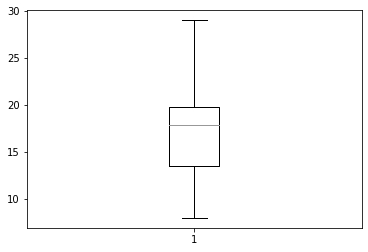

In [43]:
plt.boxplot(df["Delivery Time"])
plt.show()
#How to plot two boxplots side by side (group boxplots)

C:\Users\santo\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

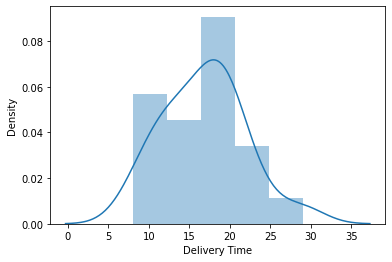

In [44]:
sns.distplot(df["Delivery Time"])


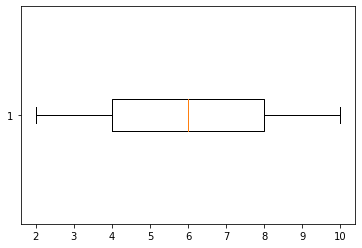

In [45]:
plt.boxplot(df["Sorting Time"],vert=False)
plt.show()

C:\Users\santo\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

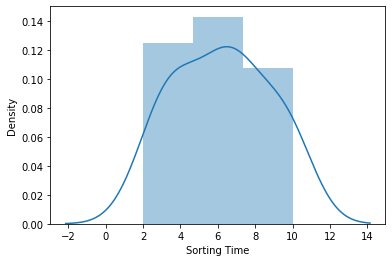

In [46]:
sns.distplot(df["Sorting Time"])

<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

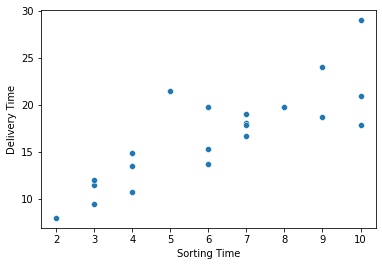

In [47]:
sns.scatterplot(x=df["Sorting Time"],y=df["Delivery Time"])

In [48]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [49]:
#Positive correlation between Delivery Time and Sorting Time, implies as DT increases ST increases

In [50]:
df1=df.rename(columns= {"Delivery Time":"DT","Sorting Time":"ST"} )

In [51]:
df1.tail()

,DT,ST
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


In [52]:
import statsmodels.formula.api as smf
model=smf.ols("DT~ST",data=df1).fit()

<AxesSubplot:xlabel='ST', ylabel='DT'>

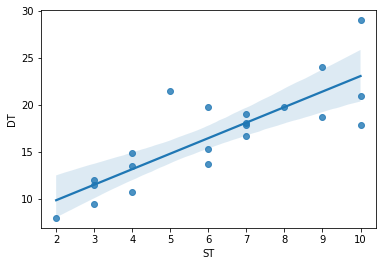

In [53]:
sns.regplot(x='ST',y='DT',data=df1)

In [54]:
model.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [55]:
#p-Values
print(model.pvalues)   

Intercept    0.001147
ST           0.000004
dtype: float64


In [ ]:
#SLop p-value=0.00004 is less than Alpha(0.05) , we reject Null Hypothesis. Hence there's a relation between varaibles

In [56]:
#R squared value
(model.rsquared)

0.6822714748417231

In [ ]:
#Not a best fit model but acceptable as r^2 is greater than 0.65

In [57]:
#Predict for 6 Sorting time
newdata=pd.Series([20])

In [58]:
data_pred=pd.DataFrame(newdata,columns=['ST'])

In [59]:
model.predict(data_pred)

0    39.563132
dtype: float64

# Q2) Linear Rregression Salary_Data

In [78]:
df=pd.read_csv("Salary_data.csv")

In [79]:
df.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [81]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


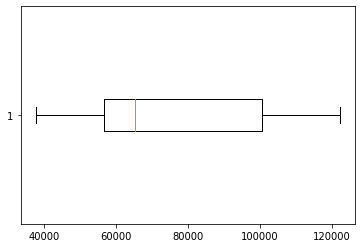

In [83]:
plt.boxplot(df["Salary"],vert=False)
plt.show()

C:\Users\santo\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

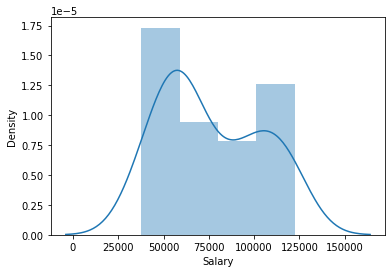

In [85]:
sns.distplot(df["Salary"])

C:\Users\santo\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

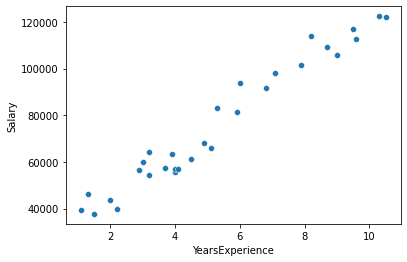

In [82]:
sns.scatterplot(df["YearsExperience"],df["Salary"])

In [67]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [86]:
import statsmodels.formula.api as smf
model=smf.ols("Salary~YearsExperience",data=df).fit()

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

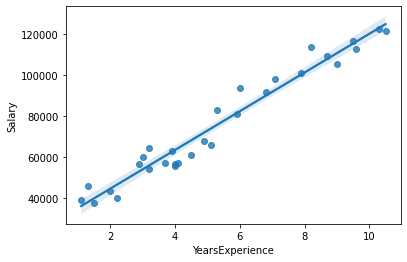

In [88]:
sns.regplot(x='YearsExperience',y='Salary',data=df)

In [89]:
print(model.pvalues)

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [105]:
print(model.rsquared)

0.9569566641435086


In [101]:
new_data=pd.Series([12,13])

In [102]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])

In [103]:
data_pred

,YearsExperience
0,12
1,13


In [104]:
model.predict(data_pred)

0    139191.748056
1    148641.710378
dtype: float64